# Project 2  Ames Housing Data and Kaggle Challenge

## Introduction

In this notebook, we will be performing our model testing with the required linear algorithms and submitting our predictions to Kaggle.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor

sns.set_style('ticks')

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# Importing in cleaned train data
train = pd.read_csv('../datasets/train_processed.csv')
train

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,year_built,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmt_unf_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,mo_sold,yr_sold,saleprice,house_age,with_porch,remod/add,big_house,exterior
0,109,60,RL,0.0,9.511777,1,Lvl,CulDSac,Sawyer,RRAe,1Fam,2Story,6,8,1976,Gable,BrkFace,5.669881,4,TA,CBlock,3,1,GLQ,6.280396,5.262690,5,6.587550,6.626718,7.299797,0.0,2,1,3,4,0,0,Attchd,RFn,475.0,TA,0.000000,3,2010,11.779129,3.555348,1,1,0,Wood
1,544,60,RL,43.0,9.349493,1,Lvl,CulDSac,SawyerW,Norm,1Fam,2Story,7,5,1996,Gable,BrkFace,4.890349,4,TA,PConc,4,1,GLQ,6.458338,5.624018,5,6.817831,7.098376,7.660585,1.0,2,1,4,4,1,3,Attchd,RFn,559.0,TA,0.000000,4,2009,12.301383,2.639057,1,1,0,Vinyl
2,153,20,RL,68.0,8.977525,0,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,7,1953,Gable,None,0.000000,3,Gd,CBlock,3,1,GLQ,6.595781,5.789960,3,6.964136,0.000000,6.964136,1.0,1,0,3,4,0,0,Detchd,Unf,246.0,TA,0.000000,1,2010,11.599103,4.060443,1,1,0,Vinyl
3,318,60,RL,73.0,9.190444,0,Lvl,Inside,Timber,Norm,1Fam,2Story,5,5,2006,Gable,None,0.000000,3,TA,PConc,4,1,Unf,0.000000,5.953243,4,6.613384,6.552508,7.275865,0.0,2,1,3,3,0,0,BuiltIn,Fin,400.0,TA,4.615121,4,2010,12.066811,1.609438,0,1,0,Vinyl
4,255,50,RL,82.0,9.563529,1,Lvl,Inside,SawyerW,Norm,1Fam,1.5Fin,6,8,1900,Gable,None,0.000000,3,TA,PConc,2,1,Unf,0.000000,6.517671,3,6.723832,6.421622,7.276556,0.0,2,0,3,3,0,0,Detchd,Unf,484.0,TA,0.000000,3,2010,11.838626,4.709530,1,1,0,Wood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1587,20,RL,79.0,9.345745,1,HLS,Inside,Timber,Norm,1Fam,1Story,8,5,2007,Gable,None,0.000000,4,TA,PConc,4,3,GLQ,6.919684,6.773080,5,7.455298,0.000000,7.455298,1.0,2,0,3,4,1,4,Attchd,Fin,520.0,TA,0.000000,1,2008,12.607366,0.693147,1,0,0,Vinyl
2042,785,30,RL,0.0,9.420844,1,Lvl,Inside,Edwards,Norm,1Fam,1Story,4,5,1940,Gable,None,0.000000,3,TA,CBlock,3,1,BLQ,5.572154,6.396930,5,6.759255,0.000000,6.759255,0.0,1,0,1,3,0,0,Detchd,Unf,539.0,TA,5.068904,3,2009,11.320554,4.248495,0,1,0,Vinyl
2043,916,50,RL,57.0,8.930494,0,Bnk,Inside,Crawfor,Norm,1Fam,1.5Fin,6,6,1928,Gable,None,0.000000,3,TA,BrkTil,3,1,Unf,0.000000,6.799056,4,7.067320,6.609349,7.556951,0.0,1,1,3,3,1,3,Detchd,Unf,342.0,Fa,0.000000,3,2009,12.083905,4.406719,0,1,0,Brick
2044,639,20,RL,80.0,9.249657,0,Lvl,Corner,NAmes,Norm,1Fam,1Story,4,5,1956,Gable,None,0.000000,3,TA,CBlock,3,1,Rec,5.049856,5.690359,3,7.090910,0.000000,7.090910,1.0,1,0,3,3,2,4,Attchd,Unf,294.0,TA,0.000000,11,2009,11.877569,3.988984,1,0,0,Wood


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2046 non-null   int64  
 1   ms_subclass     2046 non-null   int64  
 2   ms_zoning       2046 non-null   object 
 3   lot_frontage    2046 non-null   float64
 4   lot_area        2046 non-null   float64
 5   lot_shape       2046 non-null   int64  
 6   land_contour    2046 non-null   object 
 7   lot_config      2046 non-null   object 
 8   neighborhood    2046 non-null   object 
 9   condition_1     2046 non-null   object 
 10  bldg_type       2046 non-null   object 
 11  house_style     2046 non-null   object 
 12  overall_qual    2046 non-null   int64  
 13  overall_cond    2046 non-null   int64  
 14  year_built      2046 non-null   int64  
 15  roof_style      2046 non-null   object 
 16  mas_vnr_type    2046 non-null   object 
 17  mas_vnr_area    2046 non-null   f

In [4]:
# Convert ms_subclass to object
train['ms_subclass'] = train['ms_subclass'].astype('object')

### One hot encoding

In [5]:
# Perform One hot encoding on train data
train_dummies = pd.get_dummies(train, drop_first = True)
train_dummies

# 149 columns after one hot encoding

,id,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,mas_vnr_area,exter_qual,bsmt_qual,bsmt_exposure,bsmtfin_sf_1,bsmt_unf_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,fireplaces,fireplace_qu,garage_area,wood_deck_sf,mo_sold,yr_sold,saleprice,house_age,with_porch,remod/add,big_house,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_None,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,garage_finish_None,garage_finish_RFn,garage_finish_Unf,garage_cond_Fa,garage_cond_Gd,garage_cond_None,garage_cond_Po,garage_cond_TA,exterior_Brick,exterior_Metal,exterior_Mix,exterior_Stone,exterior_Vinyl,exterior_Wood
0,109,0.0,9.511777,1,6,8,1976,5.669881,4,3,1,6.280396,5.262690,5,6.587550,6.626718,7.299797,0.0,2,1,3,4,0,0,475.0,0.000000,3,2010,11.779129,3.555348,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,544,43.0,9.349493,1,7,5,1996,4.890349,4,4,1,6.458338,5.624018,5,6.817831,7.098376,7.660585,1.0,2,1,4,4,1,3,559.0,0.000000,4,2009,12.301383,2.639057,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,153,68.0,8.977525,0,5,7,1953,0.000000,3,3,1,6.595781,5.789960,3,6.964136,0.000000,6.964136,1.0,1,0,3,4,0,0,246.0,0.000000,1,2010,11.599103,4.060443,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,318,73.0,9.190444,0,5,5,2006,0.000000,3,4,1,0.000000,5.953243,4,6.613384,6.552508,7.275865,0.0,2,1,3,3,0,0,400.0,4.615121,4,2010,12.066811,1.609438,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,255,82.0,

### Train_test_split data

In [6]:
# Assigning X and y labels
X = train_dummies.loc[:,train_dummies.columns != 'saleprice']
y = train_dummies['saleprice']

display(X.shape)
display(y.shape)

(2046, 149)

(2046,)

In [7]:
# Train_test_split (test data is 30% of dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Scaling Data

In [8]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

###  Model Testing on train data

In [9]:
# Function for returning r2 and rmse metrics 

nfolds = 5 

def metrics(model, x, y):
    kfold = KFold(nfolds, shuffle = True, random_state = 45)
    rmse = np.sqrt(-cross_val_score(model, x, y, cv = kfold, scoring = 'neg_mean_squared_error'))
    r2 = cross_val_score(model, x, y, cv = kfold)
    return 'Mean CV R2:', r2.mean(), \
            'Mean CV RMSE:', rmse.mean()


### Baseline

In [10]:
# Baseline model with dummy_regressor
dummy_regressor = DummyRegressor()
print('Baseline:\n', metrics(dummy_regressor, X_train_scaled, y_train))

Baseline:
 ('Mean CV R2:', -0.007767758633694255, 'Mean CV RMSE:', 0.4173694987178007)


### Linear Regression

In [11]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
print('Linear Regression: \n', metrics(lr, X_train_scaled, y_train))

Linear Regression: 
 ('Mean CV R2:', -3.2736641616747652e+22, 'Mean CV RMSE:', 45920799767.21187)


### Ridge Regression

In [13]:
rd_alpha = np.logspace(0,5,200)

ridgecv = RidgeCV(alphas = rd_alpha, cv = 5)
ridgecv = ridgecv.fit(X_train_scaled, y_train)

print('Optimal ridge alpha:', ridgecv.alpha_)
print('Optimal ridge R^2:', ridgecv.score(X_train_scaled, y_train))

Optimal ridge alpha: 4.2475715525368996
Optimal ridge R^2: 0.9341002257471938


In [14]:
# Using optimum alpha

ridge = Ridge(alpha = ridgecv.alpha_)

print('Ridge Regression: \n', metrics(ridge, X_train_scaled, y_train))

Ridge Regression: 
 ('Mean CV R2:', 0.9040108565377916, 'Mean CV RMSE:', 0.1280960428996884)


### Lasso Regression

In [15]:
ls_alpha = np.logspace(-5,0,100)

lassocv = LassoCV(alphas = ls_alpha, cv = 5)
lassocv = lassocv.fit(X_train_scaled, y_train)

print('Optimal lasso alpha:', lassocv.alpha_)
print('Optimal lasso R^2:', lassocv.score(X_train_scaled, y_train))

Optimal lasso alpha: 0.002364489412645407
Optimal lasso R^2: 0.9268039915482303


In [16]:
lasso = Lasso(alpha = lassocv.alpha_)

print('Lasso Regression: \n', metrics(lasso, X_train_scaled, y_train))

Lasso Regression: 
 ('Mean CV R2:', 0.9065877080023009, 'Mean CV RMSE:', 0.1258783963877624)


### Elastic Net Regression

In [17]:
enet_alpha = np.arange(0, 1, 0.005)
enet_ratio = np.linspace(0.01, 1, 250)

enetcv = ElasticNetCV(alphas = enet_alpha, l1_ratio = enet_ratio, cv = 5)
enetcv = enetcv.fit(X_train_scaled, y_train)

print('Optimal enet alpha:', enetcv.alpha_)
print('Optimal enet lambda:', enetcv.l1_ratio_)
print('Optimal elastic net R2:', enetcv.score(X_train_scaled, y_train))

Optimal enet alpha: 0.005
Optimal enet lambda: 0.47518072289156627
Optimal elastic net R2: 0.9267666988621379


In [18]:
enet = ElasticNet(alpha = enetcv.alpha_, l1_ratio = enetcv.l1_ratio_)

print('Elastic Net Regression: \n', metrics(enet, X_train_scaled, y_train))

Elastic Net Regression: 
 ('Mean CV R2:', 0.9066116644659076, 'Mean CV RMSE:', 0.12585476012216362)


In [19]:
print('Baseline:\n', metrics(dummy_regressor, X_train_scaled, y_train))
print('Linear Regression: \n', metrics(lr, X_train_scaled, y_train))
print('Ridge Regression: \n', metrics(ridge, X_train_scaled, y_train))
print('Lasso Regression: \n', metrics(lasso, X_train_scaled, y_train))
print('Elastic Net Regression: \n', metrics(enet, X_train_scaled, y_train))

Baseline:
 ('Mean CV R2:', -0.007767758633694255, 'Mean CV RMSE:', 0.4173694987178007)
Linear Regression: 
 ('Mean CV R2:', -3.2736641616747652e+22, 'Mean CV RMSE:', 45920799767.21187)
Ridge Regression: 
 ('Mean CV R2:', 0.9040108565377916, 'Mean CV RMSE:', 0.1280960428996884)
Lasso Regression: 
 ('Mean CV R2:', 0.9065877080023009, 'Mean CV RMSE:', 0.1258783963877624)
Elastic Net Regression: 
 ('Mean CV R2:', 0.9066116644659076, 'Mean CV RMSE:', 0.12585476012216362)


From the results, we see that elastic net regression yielded the best result in terms of mean R2 (highest) and mean RMSE (lowest). Result for linear regression model could be poor due to the number of features that went into the model, increasing its complexity. 

###  Model Testing on test data

In [20]:
# Function to return rmse

def testing_metrics(y_test, preds):
    return np.sqrt(mean_squared_error(y_test, preds))

### Baseline

In [21]:
dr = DummyRegressor()
baseline = dr.fit(X_train_scaled, y_train)
baseline_preds = dr.predict(X_test_scaled)

print('Baseline R2:', dr.score(X_test_scaled, y_test))
print('Baseline RMSE:', testing_metrics(y_test, baseline_preds))

Baseline R2: -4.263159114370474e-05
Baseline RMSE: 0.39770658436180334


### Linear Regression

In [22]:
lr = LinearRegression()
lr = lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

print('Linear R2:', lr.score(X_test_scaled, y_test))
print('Linear RMSE:', testing_metrics(y_test, lr_preds))

Linear R2: -4.421049133545152e+17
Linear RMSE: 264433330.40550438


### Ridge Regression

In [23]:
rd = ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

print('Ridge R2:', rd.score(X_test_scaled, y_test))
print('Ridge RMSE:', testing_metrics(y_test, ridge_preds))

Ridge R2: 0.9145695019544446
Ridge RMSE: 0.11624117549354951


### Lasso Regression

In [24]:
ls = lasso.fit(X_train_scaled, y_train)

ls_preds = ls.predict(X_test_scaled)

print('Lasso R2:', ls.score(X_test_scaled, y_test))
print('Lasso RMSE:', testing_metrics(y_test, ls_preds))

Lasso R2: 0.91649796826445
Lasso RMSE: 0.11492170095463708


### Elastic Net Regression

In [25]:
elnet = enet.fit(X_train_scaled, y_train)

elnet_preds = elnet.predict(X_test_scaled)

print('Elastic Net R2:', elnet.score(X_test_scaled, y_test))
print('Elastic Net RMSE:', testing_metrics(y_test, elnet_preds))

Elastic Net R2: 0.916623934296982
Elastic Net RMSE: 0.11483498633207125


In [26]:
print('Baseline R2:', dr.score(X_test_scaled, y_test))
print('Baseline RMSE:', testing_metrics(y_test, baseline_preds))
print('Linear R2:', lr.score(X_test_scaled, y_test))
print('Linear RMSE:', testing_metrics(y_test, lr_preds))
print('Ridge R2:', rd.score(X_test_scaled, y_test))
print('Ridge RMSE:', testing_metrics(y_test, ridge_preds))
print('Lasso R2:', ls.score(X_test_scaled, y_test))
print('Lasso RMSE:', testing_metrics(y_test, ls_preds))
print('Elastic Net R2:', elnet.score(X_test_scaled, y_test))
print('Elastic Net RMSE:', testing_metrics(y_test, elnet_preds))

Baseline R2: -4.263159114370474e-05
Baseline RMSE: 0.39770658436180334
Linear R2: -4.421049133545152e+17
Linear RMSE: 264433330.40550438
Ridge R2: 0.9145695019544446
Ridge RMSE: 0.11624117549354951
Lasso R2: 0.91649796826445
Lasso RMSE: 0.11492170095463708
Elastic Net R2: 0.916623934296982
Elastic Net RMSE: 0.11483498633207125


Based on the results, elastic net is the best model for its high R2 and low RMSE. The linear regression model did the worst, due to the difficulty in capturing data points on a single line fit through 149 features. We will be using elastic net regression for our final model.

||R2|RMSE|
|---|---|---|
|**Baseline**|-4.263|0.3977|
|**Linear Regression**|-4.4210|264433330|
|**Ridge Regression**|0.9145|0.1162|
|**Lasso Regression**|0.9164|0.1149|
|**Elastic Net Regression**|0.9166|0.1148|

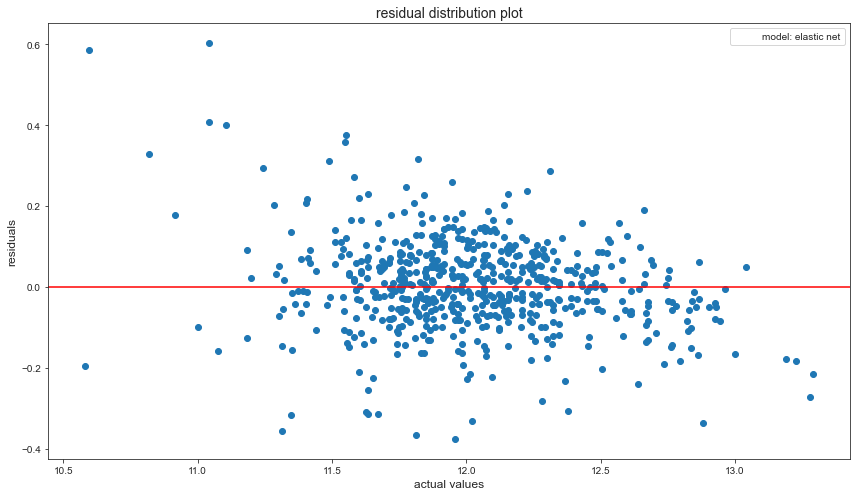

In [27]:
# Plotting residuals

resid = elnet_preds - y_test
plt.figure(figsize = (12,7))
plt.scatter(y_test, resid)
plt.axhline(0, linestyle='-', color='r')
plt.title('residual distribution plot',fontsize=14)
plt.xlabel('actual values',fontsize=12)
plt.ylabel('residuals',fontsize=12)
plt.plot([], [], ' ',label="model: elastic net")
plt.legend()
plt.tight_layout()

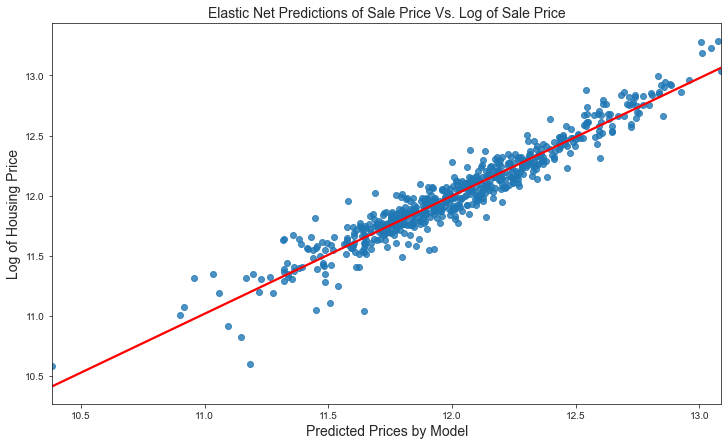

In [28]:
# plot the predictions
plt.figure(figsize=(12,7))
g = sns.regplot(x = elnet_preds, y = y_test, ci = False, fit_reg = True)

regline = g.get_lines()[0]
regline.set_color('red')

plt.xlabel("Predicted Prices by Model",fontsize =14)
plt.ylabel("Log of Housing Price",fontsize = 14)
plt.title("Elastic Net Predictions of Sale Price Vs. Log of Sale Price", fontsize=14)

plt.show()

The residual plot shows a fairly equal distribution between the positive and negative residuals. The plot of predicted price against actual price also shows a generally linear relationship.

For model to be easily understood, we will further whittle down the number of features to final 25 features based on the weightage of their coefficients on the selected model. With decreased amount of features, the model not only becomes less complex, variance is also decreased, thus reducing the chances of overfitting in our model.

Model produced 76 non-zero coefficients.


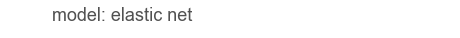

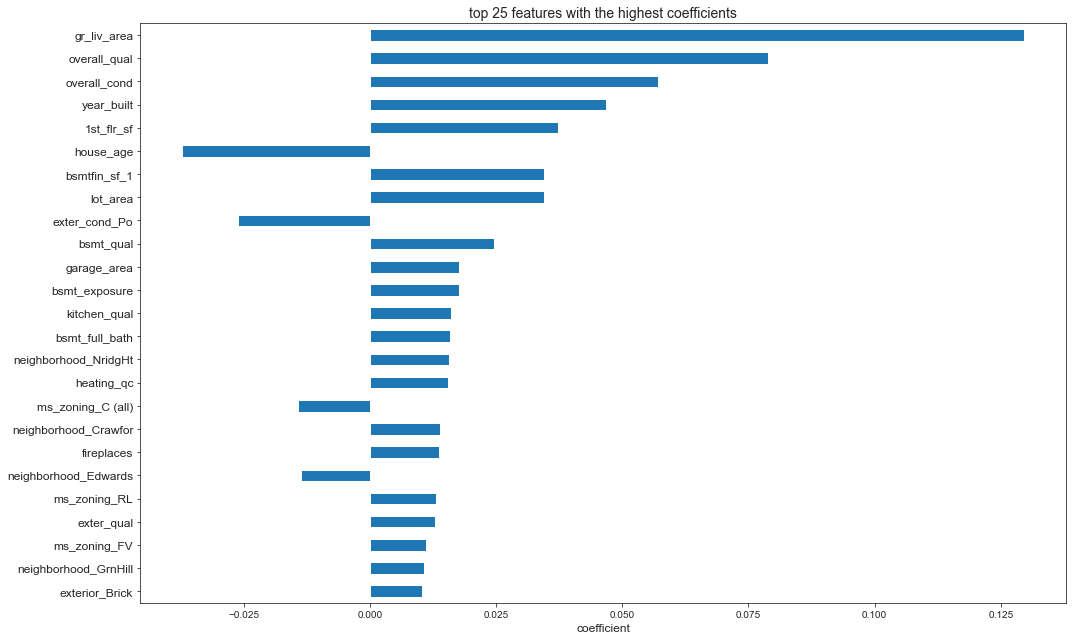

In [29]:
# get list of coefficients that are not 0
coef_labels = [col for col in train_dummies.columns if col != 'saleprice']
enet_coef = pd.DataFrame(elnet.coef_, index = coef_labels)
enet_coef = enet_coef[enet_coef[0] != 0]                                 
print(f'Model produced {enet_coef.shape[0]} non-zero coefficients.')

# Sorting by absolute values
enet_coef = enet_coef.reindex(enet_coef[0].abs().sort_values(ascending=True).index)

# Plotting title
plt.figure(figsize=(8, 0.3))
plt.text(x = 0.1,                              
         y = 0.9,                             
         s = 'model: elastic net', 
         ha = 'left',                        
         va = 'center',                       
         size = 18,                            
         alpha = 0.8)                         
plt.axis('off')

# Plotting top 25 coefficients
enet_coef.tail(25).plot.barh(figsize=(15,9), legend = None)
plt.title('top 25 features with the highest coefficients',fontsize=14)
plt.xlabel('coefficient', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [30]:
# Looking at the coefficients generated 
enet_coef[-25:]

,0
exterior_Brick,0.010296
neighborhood_GrnHill,0.010775
ms_zoning_FV,0.011177
exter_qual,0.012941
ms_zoning_RL,0.013158
neighborhood_Edwards,-0.013557
fireplaces,0.013689
neighborhood_Crawfor,0.013816
ms_zoning_C (all),-0.014145
heating_qc,0.015422


In [32]:
# get list of top 25 predictors
predictors = list(enet_coef.index[-25:])


# There are only 2 counts of 'neighbourhood_GrnHill' in the dataset. We will be be removing it from our predictors 
# as the low count may cause inaccuracies in our model. Moreover, later on in the test dataset, we find out that there 
# are no 'neighborhood_GrnHill in the test data, corroborating our decision. 

predictors.remove('neighborhood_GrnHill')
len(predictors)

24

In [33]:
# Filtering predictor columns in X_train_scaled and X_test_scaled
X_train_df = pd.DataFrame(X_train_scaled, columns = coef_labels)
X_test_df = pd.DataFrame(X_test_scaled, columns = coef_labels)

X_train_slice = X_train_df[predictors]
X_test_slice = X_test_df[predictors]

# CV training score
print(metrics(elnet, X_train_slice, y_train))

# fit model to train data
enet = enet.fit(X_train_slice, y_train)

# predict on test data
y_preds = enet.predict(X_test_slice)

# get test scores
print('enet test R2: ', enet.score(X_test_slice, y_test))
print('enet test RMSE: ', testing_metrics(y_test, y_preds))

('Mean CV R2:', 0.9045850322278891, 'Mean CV RMSE:', 0.1273612587972105)
enet test R2:  0.9085915252745321
enet test RMSE:  0.12023938745392944


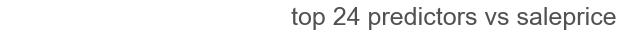

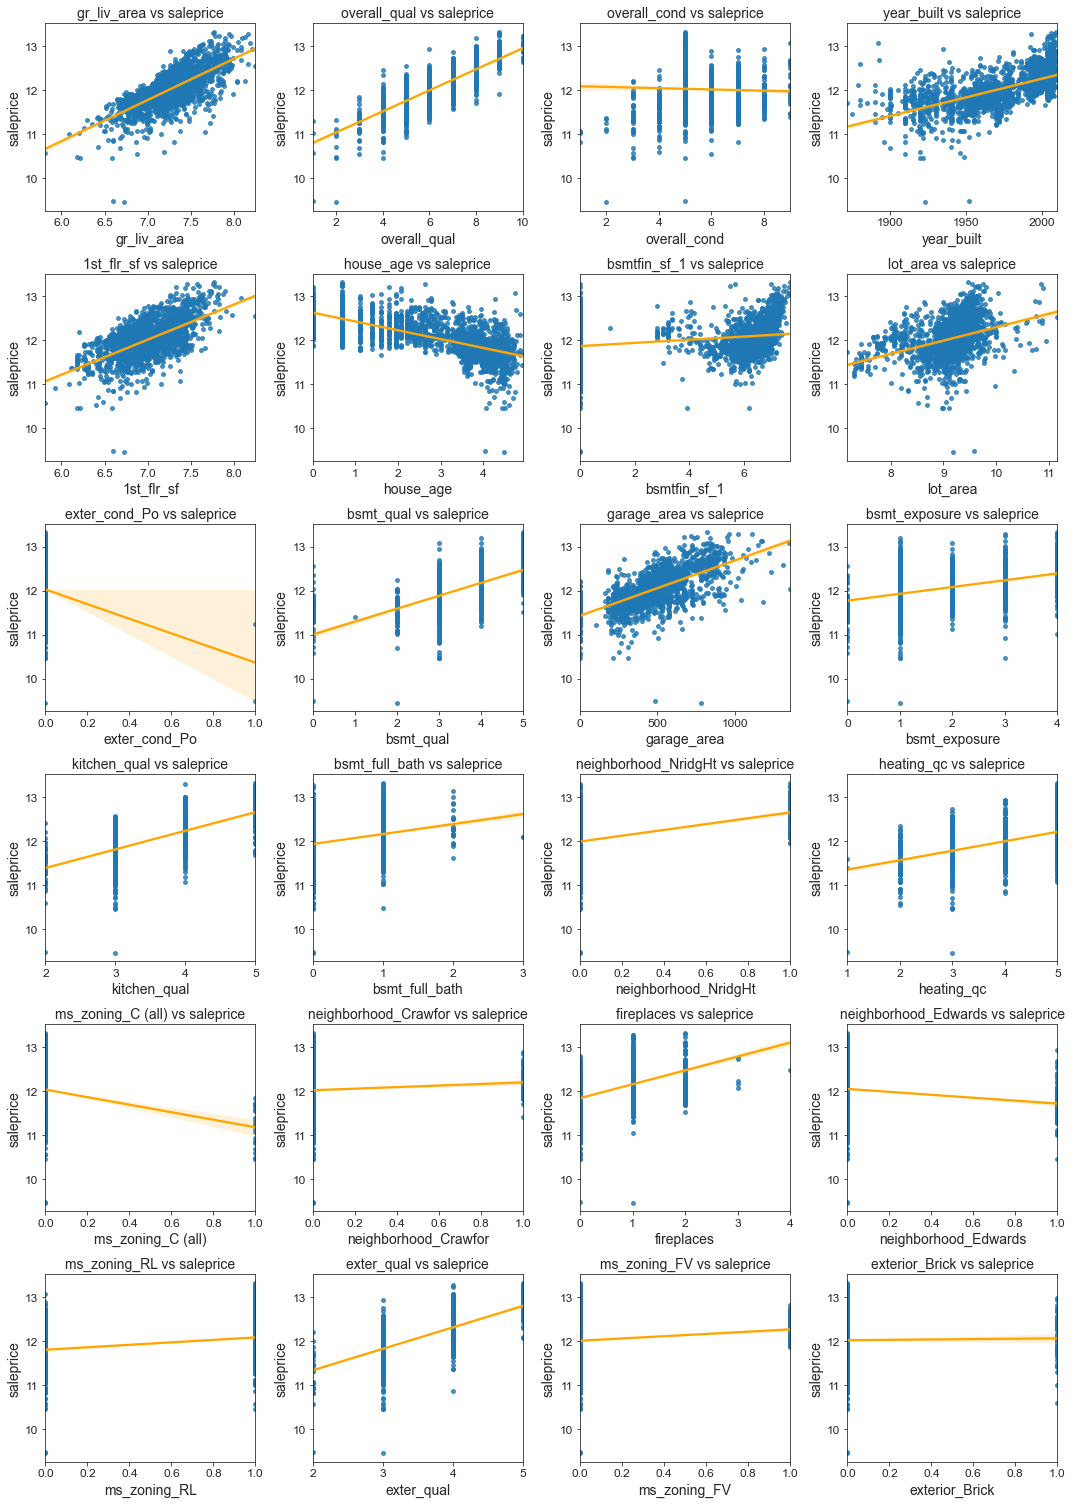

In [34]:
# Function for scatterplots 
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i], \
                    scatter_kws={'s':15},
                    line_kws = {'color':'orange'})
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
# scatterplots for top 25 predictors
plt.figure(figsize=(8, 0.3))
plt.text(x = 1,                              
         y = 0.9,                             
         s = 'top 24 predictors vs saleprice', 
         ha = 'center',                        
         va = 'center',                       
         size = 25,                            
         alpha = 0.8)                         
plt.axis('off')

subplot_scatter(train_dummies, predictors[::-1])

In [35]:
test = pd.read_csv('../datasets/test_processed.csv')

# convert mssubclass to string again since it got converted back to int on import
test['ms_subclass'] = test['ms_subclass'].astype('object')

test.head(5)

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,year_built,roof_style,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmt_unf_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,mo_sold,yr_sold,house_age,with_porch,remod/add,big_house,exterior
0,2658,190,RM,69.0,9142,0,Lvl,Inside,OldTown,Norm,2fmCon,2Story,6,8,1910,Gable,None,0.0,3,Fa,Stone,2,1,Unf,0,1020,4,908,1020,1928,0,2,0,4,2,0,0,Detchd,Unf,440,Po,0,4,2006,96.0,1,1,0,Aesbestos
1,2718,90,RL,0.0,9662,1,Lvl,Inside,Sawyer,Norm,Duplex,1Story,5,4,1977,Gable,None,0.0,3,TA,CBlock,4,1,Unf,0,1967,3,1967,0,1967,0,2,0,6,3,0,0,Attchd,Fin,580,TA,170,8,2006,29.0,0,0,0,Wood
2,2414,60,RL,58.0,17104,1,Lvl,Inside,Gilbert,Norm,1Fam,2Story,7,5,2006,Gable,None,0.0,4,TA,PConc,4,3,GLQ,554,100,5,664,832,1496,1,2,1,3,4,1,4,Attchd,RFn,426,TA,100,9,2006,0.0,1,0,0,Vinyl
3,1989,30,RM,60.0,8520,0,Lvl,Inside,OldTown,Norm,1Fam,1Story,5,6,1923,Gable,None,0.0,4,TA,CBlock,3,1,Unf,0,968,3,968,0,968,0,1,0,2,3,0,0,Detchd,Unf,480,TA,0,7,2007,84.0,1,1,0,Wood
4,625,20,RL,0.0,9500,1,Lvl,Inside,NAmes,Norm,1Fam,1Story,6,5,1963,Gable,BrkFace,247.0,3,TA,CBlock,4,1,BLQ,609,785,4,1394,0,1394,1,1,1,3,3,2,4,Attchd,RFn,514,TA,0,7,2009,46.0,1,0,0,Wood


In [36]:
# Transform skewed numericals present in train data for test data

skewed = ['lot_area','mas_vnr_area','bsmtfin_sf_1','bsmt_unf_sf','1st_flr_sf','2nd_flr_sf','gr_liv_area','wood_deck_sf',
         'house_age']

for skew in skewed:
    test.loc[:,skew] = np.log1p(test[skew])

In [37]:
test_dummies = pd.get_dummies(test)
test_dummies

,id,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,mas_vnr_area,exter_qual,bsmt_qual,bsmt_exposure,bsmtfin_sf_1,bsmt_unf_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,fireplaces,fireplace_qu,garage_area,wood_deck_sf,mo_sold,yr_sold,house_age,with_porch,remod/add,big_house,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,exter_cond_Ex,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_None,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,garage_finish_Fin,garage_finish_None,garage_finish_RFn,garage_finish_Unf,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_None,garage_cond_Po,garage_cond_TA,exterior_Aesbestos,exterior_Brick,exterior_Metal,exterior_Mix,exterior_Vinyl,exterior_Wood
0,2658,69.0,9.120744,0,6,8,1910,0.000000,3,2,1,0.000000,6.928538,4,6.812345,6.928538,7.564757,0,2,0,4,2,0,0,440,0.000000,4,2006,4.574711,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,2718,0.0,9.176059,1,5,4,1977,0.000000,3,4,1,0.000000,7.584773,3,7.584773,0.000000,7.584773,0,2,0,6,3,0,0,580,5.141664,8,2006,3.401197,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2414,58.0,9.747126,1,7,5,2006,0.000000,4,4,3,6.318968,4.615121,5,6.499787,6.725034,7.311218,1,2,1,3,4,1,4,426,4.615121,9,2006,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1989,60.0,9.050289,0,5,6,1923,0.000000,4,3,1,0.000000,6.876265,3,6.876265,0.000000,6.876265,0,1,0,2,3,0,0,480,0.000000,7,2007,4.442651,1,1,0,

In [38]:
len(predictors)

24

In [39]:
# slice out selected predictors from the test data
test_sliced = test_dummies[predictors]
X_train_sliced = X_train[predictors]

# transforming test data
ss = StandardScaler()
ss.fit(X_train_sliced)
test_scaled = ss.transform(test_sliced)

In [40]:
# predict on test data
y_preds = elnet.predict(test_scaled)

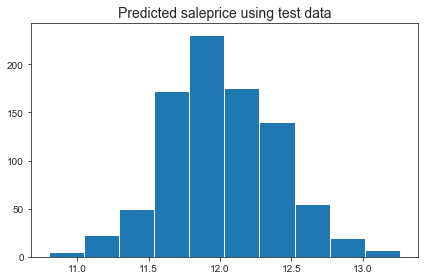

In [41]:
# Checking distribution of predictions (log - transformed)
plt.hist(y_preds)
plt.title('Predicted saleprice using test data', fontsize = 14)
plt.tight_layout()

In [42]:
y_preds_un = np.exp(y_preds)

# check that there're 878 prediction rows
submission = pd.DataFrame({'Id': test.id, 'SalePrice': y_preds_un})
print(submission.shape)
submission.to_csv('../datasets/submission_1.csv', index =False)

(878, 2)


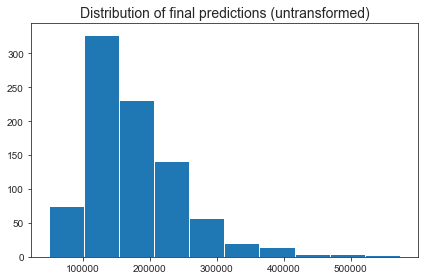

In [43]:
# Distribution check of y_preds (exp untransformed)
plt.hist(y_preds_un)
plt.title('Distribution of final predictions (untransformed)', fontsize = 14)
plt.tight_layout()

### Submission and score on Kaggle

![submission_1.PNG](../assets/submission_1.PNG)

## Conclusion and recommendations

An elastic net regression model had the best predictive performance on housing sale price in Ames USA, and outperformed the other linear models tested. As a regularised regression method, it was able to reveal which features affect sale price the most.

Square feet area, condition, age, and the location of the house are the most important determinant factors of how much a house sells for. As a buyer with a specific budget, the model would allow them to find out what features they would be able to afford. Houses in Northridge Heights and Crawford had higher prices compared to other neighbourhoods, therefore those looking to invest could consider those areas, whereas houses in neighborhood of Edwards (mean sale price of \\$130,493, well below the total sale price mean of \\$181,470) should be avoided. 

Conversely, people looking to sell their house would be able to use the model to get an estimate of how much they would be able to sell their house for, given the features of the house. If one is looking to sell their house, they should do it sooner rather than later, as the age of the house is the biggest contributing factor to the decrease in value. If the exterior of the house is kept in poor condition, the value of the house naturally drops. Therefore, those looking to increase the value of their home could consider the following (in order of how much each feature affect price):

repainting the interior and exterior of the house to improve overall material and finish quality
renovating the kitchen to improve kitchen quality,
adding a fireplace and full bath (if not already present),
renovating the house if it had been severely damaged
However, as the model was developed using data on houses sold between 2006 - 2010 in Ames, USA, it may have limited applicabilities. Firstly, it captures only a small time frame of four years (also with some missing months in each year). This is not enough to capture any annual patterns in sale price that could arise as a result of external factors, such as policy changes, the current economomy and whether or not it is a recession year. As it is currently 2022, the global economy has been negatively impacted by COVID-19 pandemic outbreak Therefore this model may not be accurate when applied to present-day data.

Secondly, there may also be other factors affecting house price, since the model only accounted for 90.8% of the variations in sale price. The remaining 9.2% could be due to factors related to area desirability (i.e. location) or other psychological factors. In the current dataset, only neighborhoods and proximity to roads are included under this category. In reality, factors like presence of schools, hospitals, malls, beaches, and the CBD are some examples of other factors that are also likely to affect house price.

Lastly, the model is specific to houses in Ames and may not be as accurate when applied to data from another city or country. The geographical landscape can vary a lot across different places and as such, there are also different risks, eg. living near the sea involves the risk of losing the house to tsunamis or have a higher risk of a break-in when living in an area with high crime rate. There are also variations in cultures, which mean people in different countries look for different things in a house, which would in turn affect sale price. To make the model more universal, one would need to remove certain Ames- or USA- specific features, such as garage presence, basement presence, and the Ames neighbourhoods. These could be converted to or included in more universal features, such as total square footage.

In reality, house price may be difficult to predict as it is also affected by buyers' psychology, the economic climate, cultural differences and other factors not included in the present dataset. There will never be a perfect model; the aim of this model is therefore not to give a perfect prediction, but only act as a guideline to inform decisions.